In [4]:
# Libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from IPython.display import Image
import pydotplus
import graphviz

1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
df.head(10)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


2) Convert default and student to categorical variables.

In [6]:
df['default'] = df['default'].replace("Yes",1).replace("No",0)
df['student'] = df['student'].replace("Yes",1).replace("No",0)
df.head(10)

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879
5,6,0,1,919.588530,7491.558572
6,7,0,0,825.513331,24905.226578
7,8,0,1,808.667504,17600.451344
8,9,0,0,1161.057854,37468.529288
9,10,0,0,0.000000,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.

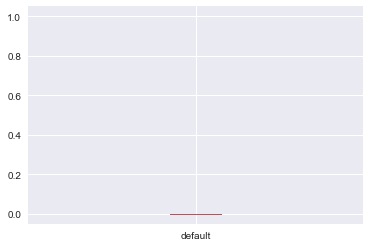

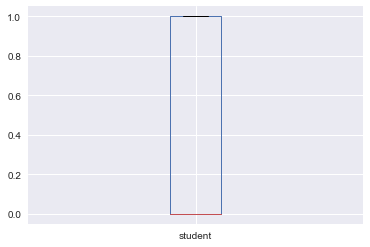

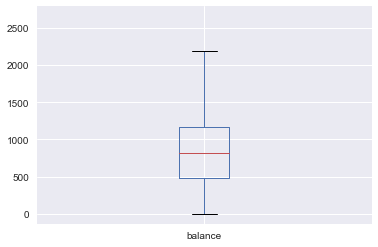

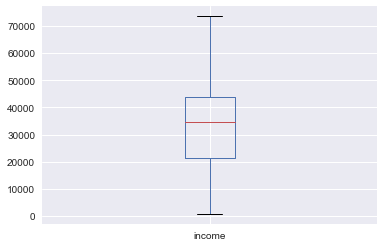

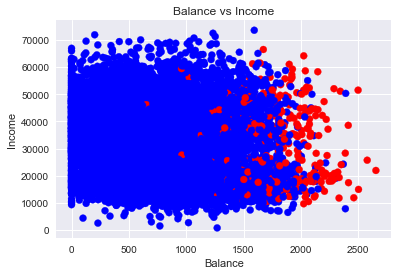

In [7]:
df['default'].plot.box(), plt.show()
df['student'].plot.box(), plt.show()
df['balance'].plot.box(), plt.show()
df['income'].plot.box(), plt.show()

colors = df["default"].replace(1,"r").replace(0,"b")
plt.scatter(df['balance'],df['income'],c=colors)
plt.title("Balance vs Income")
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

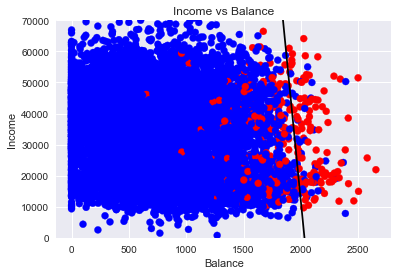

AUC ROC = 0.942644


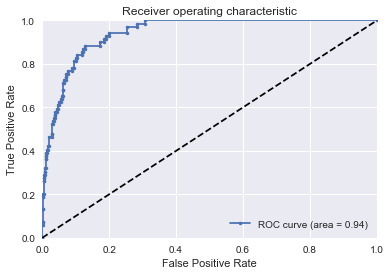

In [8]:
X = df[['balance','income']]
y = df['default']

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

logreg = LogisticRegression(penalty='l1')
clf = logreg.fit(X_train,y_train)
coef = clf.coef_
a = coef[0]
b = clf.intercept_
x = np.arange(0, 2600, 1)
y = (b + a[0] * x) / -a[1]
plt.scatter(df['balance'], df['income'], c=colors)
plt.plot(x, y, c = 'black')
plt.ylim(0, 70000)
plt.title('Income vs Balance')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

# Computation of AUC ROC
probas_ = logreg.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC ROC = %f" % roc_auc)

# Plot AUC ROC
plt.clf()
plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?

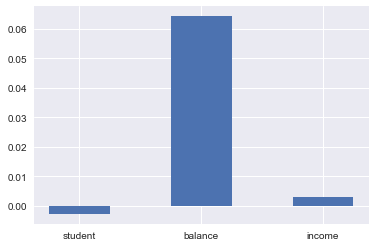

('Coefficients: ', array([-0.00280049,  0.06434194,  0.00306679]))


In [15]:
X = df[['student','balance','income']]
y = df['default']

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

alpha = np.logspace(-5, -1, 100)
score = []
for a in alpha:
    clf = Ridge(alpha = a)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
idx = np.array(score).argmax()
clf = Ridge(alpha = alpha[idx])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('student', 'balance','income'))
rects = ax.patches
plt.show()
print('Coefficients: ', clf.coef_)

AUC ROC = 0.943785


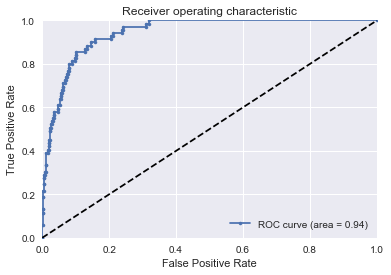

ROC increased to 0.943785 from 0.942622 with the added variable.


In [16]:
# Model Training
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Computation of AUC ROC
probas_ = logreg.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC ROC = %f" % roc_auc)

# Plot AUC ROC
plt.clf()
plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("ROC increased to 0.943785 from 0.942622 with the added variable.")

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

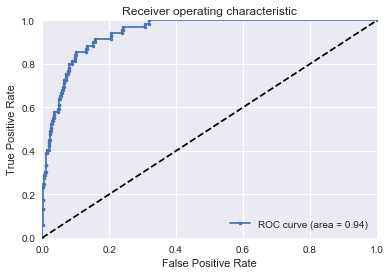

('ROC for Random State:', 0)


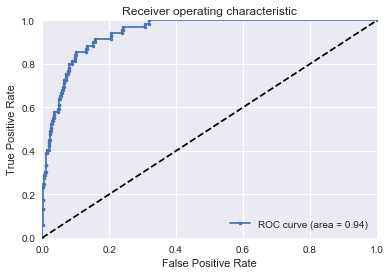

('ROC for Random State:', 1)


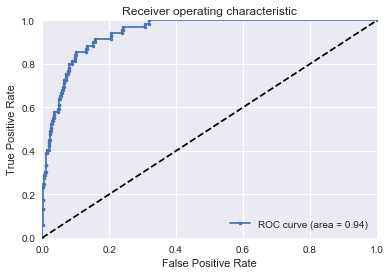

('ROC for Random State:', 2)


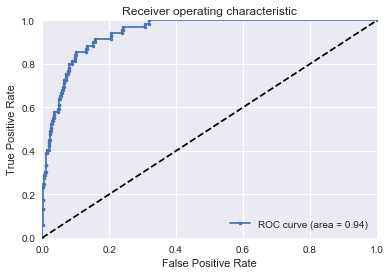

('ROC for Random State:', 3)


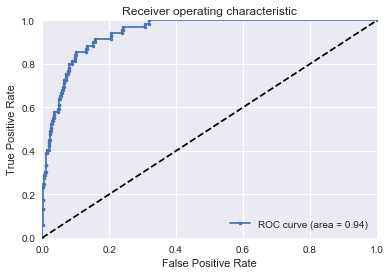

('ROC for Random State:', 4)


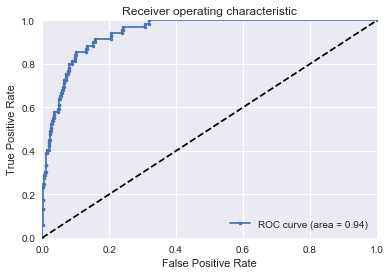

('ROC for Random State:', 5)


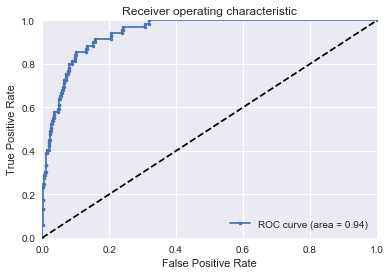

('ROC for Random State:', 6)


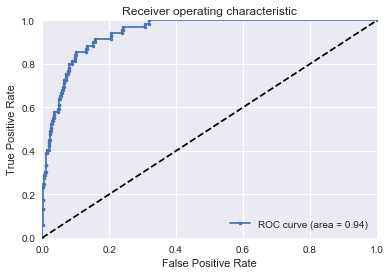

('ROC for Random State:', 7)


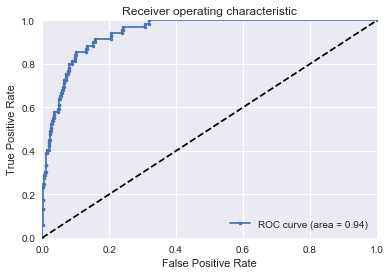

('ROC for Random State:', 8)


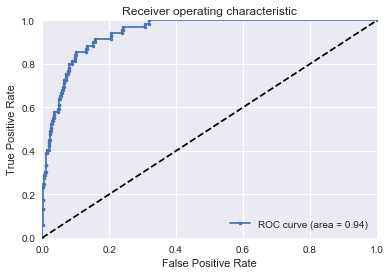

('ROC for Random State:', 9)


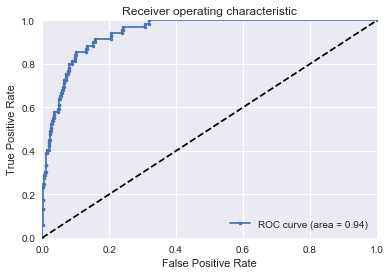

('ROC for Random State:', 10)


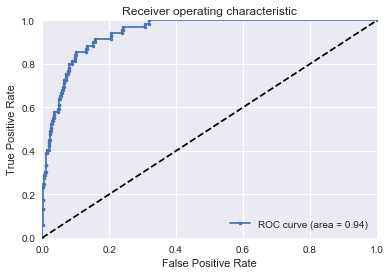

('ROC for Random State:', 11)


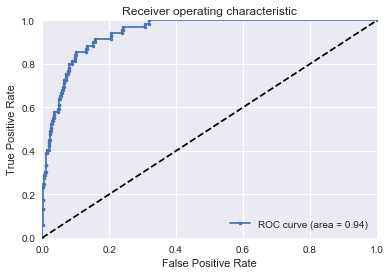

('ROC for Random State:', 12)


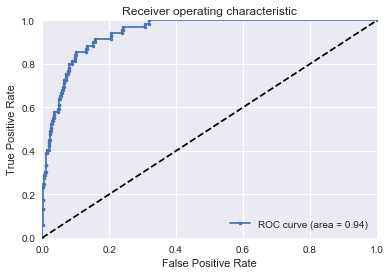

('ROC for Random State:', 13)


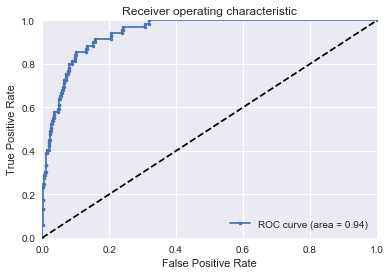

('ROC for Random State:', 14)


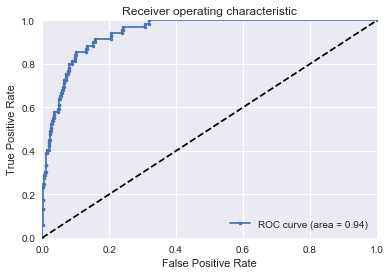

('ROC for Random State:', 15)


In [11]:
random_states=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    clf = LogisticRegression(penalty = 'l1', C = alpha[idx])
    clf.fit(X_train, y_train)
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('ROC for Random State:', random_state)

The model seems robust according to cross validation. AUC ROC stayed around 0.94

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

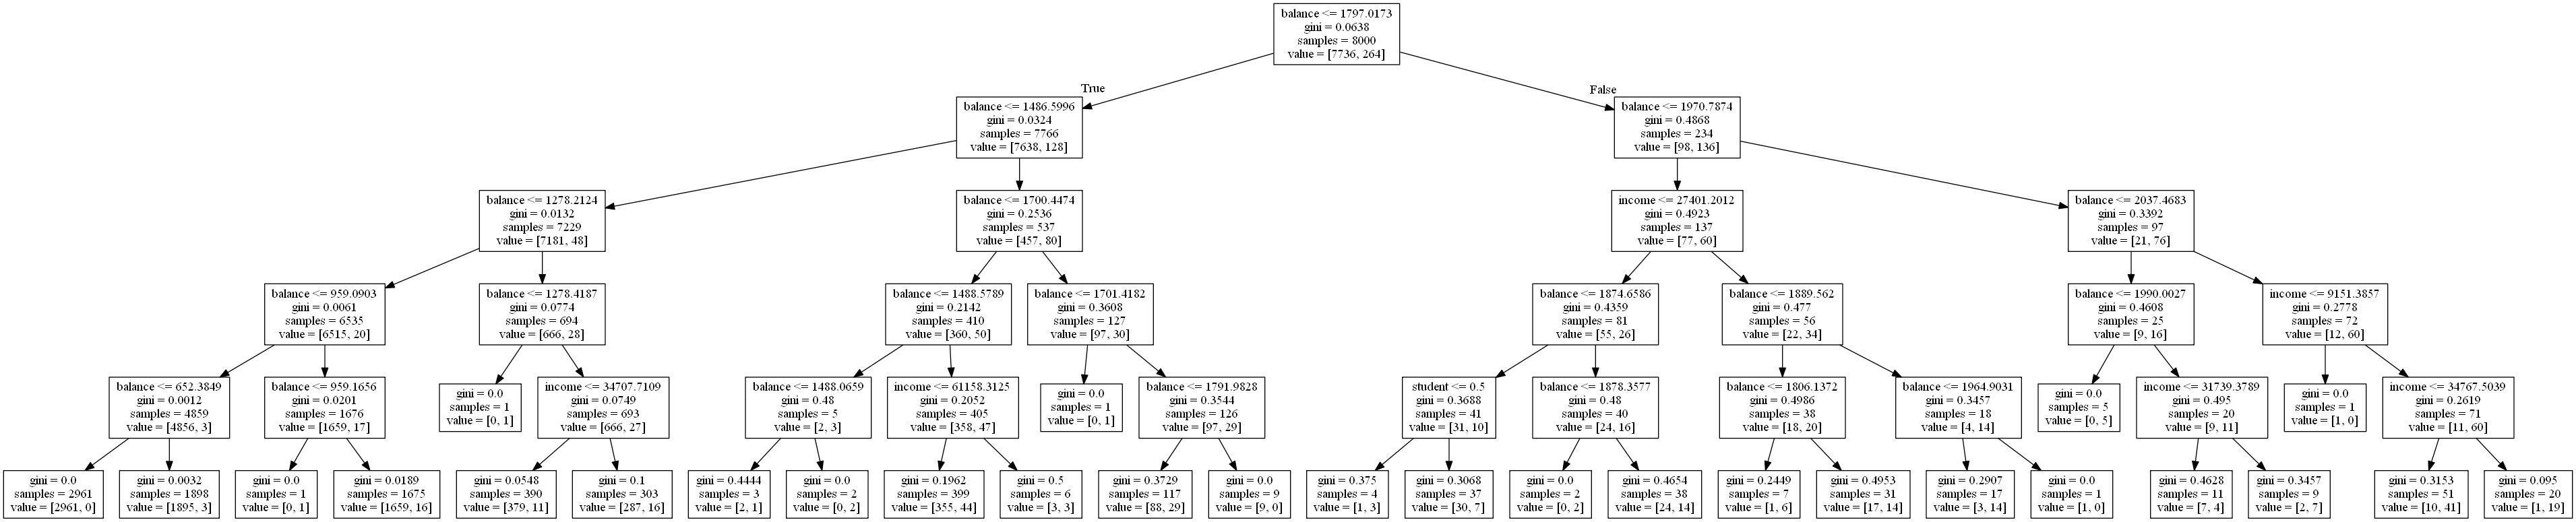

In [12]:
X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

AUC ROC = 0.921757


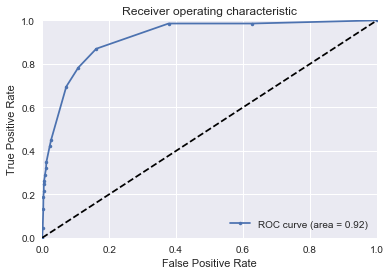

In [13]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC ROC = %f" % roc_auc)

plt.clf()
plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

AUC ROC = 0.92, the result is similar to the result of logistic regression.

8) Find the optimal decision tree depth and compute the AUC ROC.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


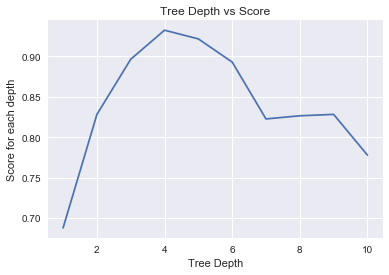

0.932549778969


In [14]:
tree_depths = range(1,11)
print(tree_depths)

tree_scores = []
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

for depth in tree_depths:
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier, max_depth=depth)
    tree_scores.append(roc_auc)
    
plt.plot(tree_depths,tree_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Score for each depth')
plt.title('Tree Depth vs Score')
plt.show()

opt_depth = tree_depths[np.argmax(tree_scores)]

fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier, max_depth=opt_depth)
print(roc_auc)

The optimal tree depth is 4 according to the graph above. The AUC ROC is 0.9325.